# **Assignment 2 - Random Forest and SVM**
## Author: Jake Brulato
## Tuesday 5:30 - 8:15 : Kornelia

**Problem description and questions:  We will analyze a dataset BankChurn.csv which had data 
of a bank’s customers and their churn.  The descriptions of the columns are given below.  Run 
both Random Forest and Support Vector Machines models on the data to predict whether a 
customer will churn or not (i.e., the target variable is “churn”) and answer the questions that 
follow on the next page.**

- customer_id: Unique identifier for the customer. 
- credit_score: Customer's credit score. 
- country: The country of the customer (e.g., France, Spain, Germany). 
- gender: Customer's gender. 
- age: Customer's age. 
- tenure: Number of years the customer has been with the bank. 
- balance: Customer's account balance. 
- products_number: Number of bank products the customer is using. 
- credit_card: Indicates whether the customer has a credit card with the bank (1 = Yes, 0 = No). 
- active_member: Indicates whether the customer is an active member (1 = Yes, 0 = No). 
- estimated_salary: Customer's estimated salary. 
- churn: Indicates whether the customer has left the bank (1 = Yes, 0 = No).  

In [1]:
#Import the packages you will use
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\rbrul\AppData\Local\Temp\ipykernel_46608\2110474568.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Import the data
df_JB = pd.read_csv('BankChurn.csv', sep=',')
df_JB

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1
1,15647311,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,699,France,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0
4,15737888,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39.0,5.0,NaN,2.0,1.0,0.0,96270.64,0
9996,15569892,516,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0
9997,15584532,709,France,Female,36.0,7.0,NaN,1.0,0.0,1.0,42085.58,1
9998,15682355,772,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1


In [3]:
#Calculate the nulls and then drop them
df_JB.isnull().sum()
#vv Comment out below this line to see the total nulls for each column vv
clean_JB = df_JB.dropna()
clean_JB.info()
print(clean_JB.isnull().sum())
clean_JB

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       6377 non-null   int64  
 1   credit_score      6377 non-null   int64  
 2   country           6377 non-null   object 
 3   gender            6377 non-null   object 
 4   age               6377 non-null   float64
 5   tenure            6377 non-null   float64
 6   balance           6377 non-null   float64
 7   products_number   6377 non-null   float64
 8   credit_card       6377 non-null   float64
 9   active_member     6377 non-null   float64
 10  estimated_salary  6377 non-null   float64
 11  churn             6377 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 647.7+ KB
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
4,15737888,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,15574012,645,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
7,15656148,376,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,597,France,Female,53.0,4.0,88381.21,1.0,1.0,0.0,69384.71,1
9993,15569266,644,France,Male,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52,0
9996,15569892,516,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0
9998,15682355,772,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1


**1. Are there any variables which cannot be used in your model? Explain why? (2 pts)**

- customer_id would be the one we cannot use as its only use would be to be a complete identifier and if used, would create a model that is close to near perfect.

In [4]:
clean_JB = clean_JB.drop(["customer_id"], axis=1)
clean_JB

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
4,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,645,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,53.0,4.0,88381.21,1.0,1.0,0.0,69384.71,1
9993,644,France,Male,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52,0
9996,516,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0
9998,772,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1


**2. What variables need to be dummy coded before you run your logistic regression model? Explain what new dummy coded columns you created. (4 pts)**

I would dummy code country and gender as these are text based and need to be encoded into numerical values to be ran in the model.

In [5]:
clean_JB = pd.get_dummies(clean_JB, drop_first = True, dtype = int)
clean_JB

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
1,608,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,1,0
2,502,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,0
4,850,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,1,0
5,645,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1,0,1,1
7,376,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53.0,4.0,88381.21,1.0,1.0,0.0,69384.71,1,0,0,0
9993,644,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52,0,0,0,1
9996,516,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0,0,0,1
9998,772,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1,1,0,1


**3. Do you have to consider missing values in your dataset? How did you handle the presence of missing values, if any? (4 pts)**

- There are multiple nulls in many different columns, primarily in the column "balance" with 3617. We should consider them and make sure to clean the data so there is no potential skewing or inaccuracies by the nulls. We will remove all the nulls from all columns to be sure.

In [6]:
#Calculate the nulls and then drop them
clean_JB.isnull().sum()
clean_JB = clean_JB.dropna()
clean_JB.info()
print(clean_JB.isnull().sum())
clean_JB

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      6377 non-null   int64  
 1   age               6377 non-null   float64
 2   tenure            6377 non-null   float64
 3   balance           6377 non-null   float64
 4   products_number   6377 non-null   float64
 5   credit_card       6377 non-null   float64
 6   active_member     6377 non-null   float64
 7   estimated_salary  6377 non-null   float64
 8   churn             6377 non-null   int64  
 9   country_Germany   6377 non-null   int32  
 10  country_Spain     6377 non-null   int32  
 11  gender_Male       6377 non-null   int32  
dtypes: float64(7), int32(3), int64(2)
memory usage: 572.9 KB
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
ch

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
1,608,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,1,0
2,502,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,0
4,850,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,1,0
5,645,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1,0,1,1
7,376,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53.0,4.0,88381.21,1.0,1.0,0.0,69384.71,1,0,0,0
9993,644,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52,0,0,0,1
9996,516,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0,0,0,1
9998,772,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1,1,0,1


**4. First run the decision tree classifier using all independent variables in the dataset, after dropping the ones identified in question 1.  You can use any of the criteria of gini index or information gain.  What is the accuracy of this classifier?  Show the confusion matrix with proper labels. (5 pts)**

In [7]:
# make y (dependent variable) as np.array
y = np.array(clean_JB["churn"])

# make x a dataframe subset with independent variables
X = clean_JB.drop(['churn'], axis=1)

# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = clf_gini.predict(X_test)

In [9]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7507836990595611

Confusion Matrix:
 [[1181  269]
 [ 208  256]]


**5. Running Random Forest Classifier: (15 pts)**

**a. Run a Random Forest Classifier.  Choose the appropriate set of hyperparameters. What is the accuracy of this classifier?  Show the confusion matrix with proper labels.  Does this classifier perform better than the decision tree in question 4?**

In [10]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters 
# Define the parameter grid
param = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=RF, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-03-01 19:25:18.893193
Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best estimator: RandomForestClassifier(max_depth=8, random_state=10)
Feature importance: [0.06221947 0.35488159 0.02916885 0.09020576 0.2361622  0.00606857
 0.08210635 0.06197556 0.05018597 0.00524315 0.02178252]
End search time: 2024-03-01 19:26:43.760354



Accuracy: 0.8349007314524556


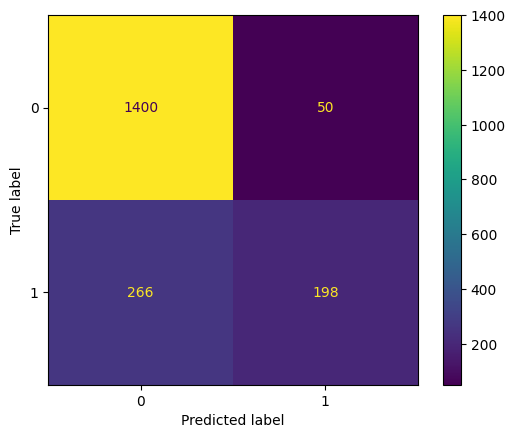

In [11]:
# confusion matrix 

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### **This does run better than the decision tree in question 4, based on the accuracy.**

**b. Re-run the Random Forest Classifier with a different set of parameters. What is the accuracy of this classifier?  Show the confusion matrix with proper labels.  Does this classifier perform better than the first two you ran?**

In [12]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters 
# Define the parameter grid
param = {
    'n_estimators': [300, 600, 900],  # Number of trees in the forest
    'max_features': ['sqrt'],  # Number of features to consider at every split
    'max_depth': [2, 5, 9],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=RF, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-03-01 19:26:43.913380
Fitting 5 folds for each of 18 candidates, totalling 90 fits


Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 600}
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=600,
                       random_state=10)
Feature importance: [0.07860078 0.33189105 0.04265374 0.11224595 0.19428234 0.00955409
 0.06759095 0.08424722 0.04554739 0.00779923 0.02558726]
End search time: 2024-03-01 19:28:42.828903



Accuracy: 0.8369905956112853


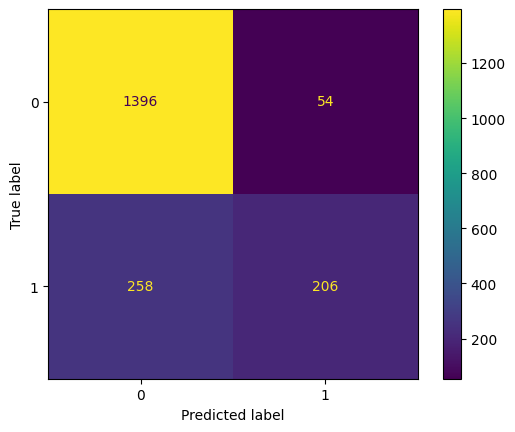

In [13]:
# confusion matrix 

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

**c. Fine tune the Random Forest model.**
- What are the optimal parameter settings for the Random Forest Classifier? 
- List the variables in the decreasing order of their importance.  Do you agree - with the rankings, based on your knowledge of why customers quit their banks? 
- Show the accuracy and confusion matrix for this classifier.

In [18]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters 
# Define the parameter grid
param = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],  # Number of trees in the forest
    'max_features': ['sqrt'],  # Number of features to consider at every split
    'max_depth': [1,2,3,4,5,6,7,8,9,10],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=RF, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-03-01 19:48:12.547983
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Best estimator: RandomForestClassifier(max_depth=10, n_estimators=500, random_state=10)
Feature importance: [0.08906299 0.31338362 0.04740451 0.11747388 0.18958945 0.01139614
 0.06686553 0.09400465 0.04092393 0.00787648 0.02201882]
End search time: 2024-03-01 20:08:15.308255



Accuracy: 0.8406478578892372


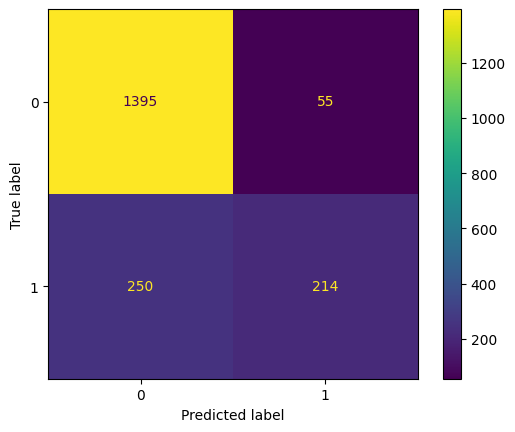

In [19]:
# confusion matrix 

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

**6. Running SVM Classifier: (15 pts)**

**a. Run an SVM Classifier, first with a linear kernel and then with a radial kernel. Give your own values for the other hyperparameters but keep them the same across the two runs of SVM. Which kernel gives a better performance for this dataset?  Explain.**

In [17]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.759 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf


Accuracy: 0.7575757575757576


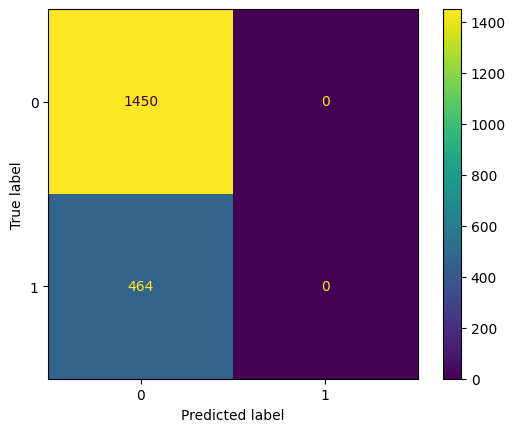

In [16]:

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures 

## Linear

In [11]:
# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# SVM -- Tunning parameters 
param = {
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1 ], # 1/n_features
    'kernel': ['rbf', 'linear'] 
}

SVM = SVC(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator= SVM, 
                    param_grid=param,
                    verbose=1, cv=5,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-03-02 04:22:26.769613
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# confusion matrix 

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures 

## Radial

In [ ]:
# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# SVM -- Tunning parameters 
param = {
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1 ], # 1/n_features
    'kernel': ['rbf'] 
}

SVM = SVC(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=SVM, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

In [ ]:
# confusion matrix 

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures 

**b. Fine tune the SVM model.**
- What are the optimal parameter settings for the SVM classifier? 
- Show the accuracy and confusion matrix for selected classifier by the fine tuning.

**7. Overall, which model (random forest or SVM) perform better for this dataset?  Explain. (5 pts)**